# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 5

### **Vectores Embebidos de OpenAI**

#### **Nombres y matrículas de los integrantes del equipo:**

- Fernando Omar Salazar Ortiz - A01796214
- Carlos Aaron Bocanegra Buitron - A01796345
- Luis Enrique González González - A01795338
- Gloria María Campos García - A01422345



In [1]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
import numpy as np
from openai import OpenAI
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Incluye las celdas necesarias para tu acceso a la API de OpenAI.
# Configura tu clave API de OpenAI
from dotenv import load_dotenv
load_dotenv()
import os

api_key = os.environ.get("OPENAI_API_KEY")
client = OpenAI(api_key=api_key)

# Verifica que la clave API esté configurada correctamente
try:
    # Intenta hacer una llamada simple a la API
    response = client.completions.create(model="gpt-3.5-turbo-instruct", prompt="Hola")

    print("Conexión exitosa con la API de OpenAI")
except Exception as e:
    print("Error al conectar con la API de OpenAI:", e)



Conexión exitosa con la API de OpenAI


# **Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [12]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Leer los archivos de texto
amazon_df = pd.read_csv('amazon5.txt', sep='\t', names=['text', 'sentiment'], header=None, encoding='utf-8')
imdb_df = pd.read_csv('imdb5.txt', sep=r'\s{3,}', names=['text', 'sentiment'], encoding='utf-8', engine='python')
yelp_df = pd.read_csv('yelp5.txt', sep='\t', names=['text', 'sentiment'], header=None, encoding='utf-8')

# Concatenar los DataFrames
df = pd.concat([amazon_df, imdb_df, yelp_df], ignore_index=True)


# *********** Aquí termina la sección de agregar código *************


In [13]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3000 non-null   object
 1   sentiment  3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [14]:
# Y veamos sus primeros registros:

df.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# **Pregunta - 2:**

Realiza el proceso de limpieza. Aplica el preprocesamiento que consideres adecuado.











In [20]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Importar las bibliotecas necesarias para limpieza de texto
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet')

def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Eliminar caracteres especiales y números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    
    # Tokenización
    tokens = word_tokenize(texto)
    
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Unir tokens nuevamente en un string
    return tokens

X = df.text
Y = df.sentiment

Xclean = [limpiar_texto(x) for x in X]


# *********** Aquí termina la sección de agregar código *************

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['way', 'plug', 'u', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversation', 'lasting', 'minutesmajor', 'problem']
['mic', 'great']


# **Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [22]:

# ************* Inicia la sección de agregar código:*****************************

# Importar train_test_split de sklearn
from sklearn.model_selection import train_test_split

# Primero dividimos en train (70%) y temp (30%)
x_train, x_temp, y_train, y_temp = train_test_split(Xclean, Y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Luego dividimos temp en validation (15%) y test (15%)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp,
                                               test_size=0.5,
                                               random_state=42)




# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


# **Pregunta - 4:**



Construye tu vocabulario a continuación


In [37]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Importar las bibliotecas necesarias
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Obtener stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para preprocesar y tokenizar texto
def preprocess_text(text):
    # Convertir a string y minúsculas
    text_str = ' '.join(text).lower()
    # Tokenizar
    tokens = word_tokenize(text_str)
    # Filtrar tokens: solo palabras alfabéticas, no stopwords y longitud mínima de 3 caracteres
    return [token for token in tokens if token.isalpha() and 
            token not in stop_words and len(token) >= 3]

# Tokenizar y preprocesar todos los textos de entrenamiento
tokens_train = []
for text in x_train:
    tokens_train.extend(preprocess_text(text))

# Contar frecuencia de palabras
word_counts = Counter(tokens_train)

# Crear vocabulario con palabras que aparecen al menos 3 veces
vocab = {word for word, count in word_counts.items() if count >= 3}

# Convertir a lista ordenada alfabéticamente
vocab = sorted(list(vocab))


# *********** Aquí termina la sección de agregar código *************

In [38]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')


# ******* Inicia la sección de agregar código: ***********


print(len(vocab))


# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:
959


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

Principalmente para evitar fuga de datos (data leakage), ya que si usáramos los conjuntos de validación o prueba para generar el vocabulario, estaríamos "contaminando" nuestro modelo con información que no debería conocer durante el entrenamiento. Esto podría llevar a un sobreajuste y a una evaluación poco realista del rendimiento del modelo. 


### ++++++++ Termina la sección de agregar texto: +++++++++++


In [47]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Función para filtrar palabras que no están en el vocabulario
def filtrar_vocabulario(texto, vocab):
    palabras_filtradas = [palabra for palabra in texto if palabra in vocab]
    return palabras_filtradas

# Aplicar el filtrado a los conjuntos de datos
train_x = [filtrar_vocabulario(texto, vocab) for texto in x_train]  # Eliminado ['text']
val_x = [filtrar_vocabulario(texto, vocab) for texto in x_val]      # Eliminado ['text']
test_x = [filtrar_vocabulario(texto, vocab) for texto in x_test]    # Eliminado ['text']


# *********** Aquí termina la sección de agregar código *************


In [48]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['belt', 'make', 'feel', 'like']
['keep', 'good', 'work', 'amazon']
['dont', 'many', 'word', 'say', 'place', 'everything', 'pretty', 'well']
['disappointed', 'battery']
['film', 'try', 'serious', 'flick', 'fails']


# **Pregunta - 5:**


#### **Incluye aquí un resumen de las características y diferencias que tiene al menos los tres modelos de OpenAI indicados: "text-embedding-3-small", "text-embedding-3-large" y "text-embedding-ada-002".**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

1. text-embedding-3-small:
- Es el modelo más reciente y eficiente
- Genera embeddings de 1536 dimensiones
- Ofrece un buen balance entre rendimiento y costo
- Tiene un mejor rendimiento que ada-002 en la mayoría de las tareas
- Es más rápido y económico que text-embedding-3-large

2. text-embedding-3-large:
- Es el modelo más potente y reciente
- Genera embeddings de 3072 dimensiones
- Ofrece el mejor rendimiento en tareas de búsqueda semántica
- Es más costoso y requiere más recursos computacionales
- Ideal para aplicaciones que requieren máxima precisión

3. text-embedding-ada-002:
- Es el modelo más antiguo de los tres
- Genera embeddings de 1536 dimensiones
- Fue el modelo estándar antes del lanzamiento de la serie 3
- Tiene un rendimiento inferior a los modelos de la serie 3
- Sigue siendo útil para aplicaciones básicas

### ++++++++ Termina la sección de agregar texto: +++++++++++


# **Pregunta - 6:**


#### **Diccionario clave-valor de palabras del diccionario y vectores embebidos.**

In [49]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


from tqdm import tqdm

# Seleccionar modelo (cada uno tiene diferentes características y costos)
# text-embedding-3-small: Más económico ($0.02/1K tokens)
# text-embedding-3-large: Mayor precisión pero más costoso ($0.13/1K tokens)
# text-embedding-ada-002: Modelo previo, buen balance ($0.0001/1K tokens)
modelo = "text-embedding-3-small"

# Generar embeddings y crear diccionario
embeddings_dict = {}
total_tokens = 0

# Procesamos por lotes para evitar límites de la API
batch_size = 100
for i in tqdm(range(0, len(vocab), batch_size)):
    batch = vocab[i:i+batch_size]
    
    # Solicitar embeddings a la API
    response = client.embeddings.create(
        model=modelo,
        input=batch
    )
    
    # Actualizar contador de tokens
    total_tokens += response.usage.total_tokens
    
    # Añadir al diccionario
    for j, embedding in enumerate(response.data):
        embeddings_dict[batch[j]] = embedding.embedding

# Guardar el diccionario
with open(f'embeddings_{modelo.replace("-", "_")}.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

print(f"Proceso completado. Total de tokens utilizados: {total_tokens}")
print(f"Costo aproximado: ${total_tokens/1000 * 0.02 if modelo=='text-embedding-3-small' else total_tokens/1000 * 0.13 if modelo=='text-embedding-3-large' else total_tokens/1000 * 0.0001} USD")
print(f"Dimensión de los vectores: {len(next(iter(embeddings_dict.values())))}")


# *********** Aquí termina la sección de agregar código *************

100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


Proceso completado. Total de tokens utilizados: 1353
Costo aproximado: $0.02706 USD
Dimensión de los vectores: 1536


# **Pregunta - 7:**



Generamos los vectores embebidos a partir de los conjuntos de entrenamiento, validación y prueba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [52]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Cargar el diccionario de embeddings desde pickle
with open('embeddings_text_embedding_3_small.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

# Función para generar el embedding de un comentario
def get_comment_embedding(comment, embeddings_dict):
    """
    Genera un embedding para un comentario promediando los embeddings de sus palabras
    """
    
    # Filtrar para mantener solo palabras que están en el diccionario
    valid_embeddings = [embeddings_dict[word] for word in comment if word in embeddings_dict]
    
    # Calcular el promedio si hay palabras válidas
    if valid_embeddings:
        return np.mean(valid_embeddings, axis=0)
    else:
        # Si no hay palabras válidas, devuelve un vector de ceros con la dimensión correcta
        embedding_dim = len(next(iter(embeddings_dict.values())))
        return np.zeros(embedding_dim)

# Generar embeddings para los conjuntos de entrenamiento, validación y prueba

print("Generando embeddings para el conjunto de entrenamiento...")
trainEmb = np.array([get_comment_embedding(comment, embeddings_dict) for comment in tqdm(train_x)])

print("Generando embeddings para el conjunto de validación...")
valEmb = np.array([get_comment_embedding(comment, embeddings_dict) for comment in tqdm(val_x)])

print("Generando embeddings para el conjunto de prueba...")
testEmb = np.array([get_comment_embedding(comment, embeddings_dict) for comment in tqdm(test_x)])


# *********** Aquí termina la sección de agregar código *************

Generando embeddings para el conjunto de entrenamiento...


100%|██████████| 2100/2100 [00:00<00:00, 3033.71it/s]


Generando embeddings para el conjunto de validación...


100%|██████████| 450/450 [00:00<00:00, 3496.23it/s]


Generando embeddings para el conjunto de prueba...


100%|██████████| 450/450 [00:00<00:00, 3694.02it/s]


In [53]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 1536)
Val-Emb: (450, 1536)
Test-Emb: (450, 1536)


# **Pregunta - 8:**



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [ ]:
# REGRESIÓN LOGÍSTICA:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

print("="*50)
print("MODELO: REGRESIÓN LOGÍSTICA")
print("="*50)

# Entrenamiento del modelo
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(trainEmb, y_train)

# Evaluación en conjunto de entrenamiento
y_train_pred_lr = lr_model.predict(trainEmb)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
print(f"Exactitud en Entrenamiento: {train_accuracy_lr:.4f}")
print("\nReporte de clasificación en Entrenamiento:")
print(classification_report(y_train, y_train_pred_lr))

# Evaluación en conjunto de validación
y_val_pred_lr = lr_model.predict(valEmb)
val_accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
print(f"\nExactitud en Validación: {val_accuracy_lr:.4f}")
print("\nReporte de clasificación en Validación:")
print(classification_report(y_val, y_val_pred_lr))

# Análisis de sobreentrenamiento
print(f"\nDiferencia entre Entrenamiento y Validación: {train_accuracy_lr - val_accuracy_lr:.4f}")
if train_accuracy_lr - val_accuracy_lr > 0.05:
    print("ADVERTENCIA: Posible sobreentrenamiento")
else:
    print("El modelo no parece estar sobreentrenado")



# *********** Aquí termina la sección de agregar código *************


MODELO: REGRESIÓN LOGÍSTICA
Exactitud en Entrenamiento: 0.8110

Reporte de clasificación en Entrenamiento:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1051
           1       0.82      0.80      0.81      1049

    accuracy                           0.81      2100
   macro avg       0.81      0.81      0.81      2100
weighted avg       0.81      0.81      0.81      2100


Exactitud en Validación: 0.7978

Reporte de clasificación en Validación:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       232
           1       0.80      0.78      0.79       218

    accuracy                           0.80       450
   macro avg       0.80      0.80      0.80       450
weighted avg       0.80      0.80      0.80       450


Diferencia entre Entrenamiento y Validación: 0.0132
El modelo no parece estar sobreentrenado


In [56]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

from sklearn.ensemble import RandomForestClassifier

print("\n" + "="*50)
print("MODELO: RANDOM FOREST")
print("="*50)

# Entrenamiento del modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(trainEmb, y_train)

# Evaluación en conjunto de entrenamiento
y_train_pred_rf = rf_model.predict(trainEmb)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Exactitud en Entrenamiento: {train_accuracy_rf:.4f}")
print("\nReporte de clasificación en Entrenamiento:")
print(classification_report(y_train, y_train_pred_rf))

# Evaluación en conjunto de validación
y_val_pred_rf = rf_model.predict(valEmb)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"\nExactitud en Validación: {val_accuracy_rf:.4f}")
print("\nReporte de clasificación en Validación:")
print(classification_report(y_val, y_val_pred_rf))

# Análisis de sobreentrenamiento
print(f"\nDiferencia entre Entrenamiento y Validación: {train_accuracy_rf - val_accuracy_rf:.4f}")
if train_accuracy_rf - val_accuracy_rf > 0.05:
    print("ADVERTENCIA: Posible sobreentrenamiento")
else:
    print("El modelo no parece estar sobreentrenado")


# *********** Aquí termina la sección de agregar código *************


MODELO: RANDOM FOREST
Exactitud en Entrenamiento: 0.9871

Reporte de clasificación en Entrenamiento:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1051
           1       0.99      0.98      0.99      1049

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100


Exactitud en Validación: 0.7689

Reporte de clasificación en Validación:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       232
           1       0.79      0.72      0.75       218

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.77      0.77      0.77       450


Diferencia entre Entrenamiento y Validación: 0.2183
ADVERTENCIA: Posible sobreentrenamiento


# **Pregunta - 9:**



Reporte del mejor modelo con el conjunto de Prueba (Test).


EVALUACIÓN DEL MEJOR MODELO EN CONJUNTO DE PRUEBA
Exactitud en Prueba: 0.8200

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       217
           1       0.82      0.83      0.83       233

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.82      0.82      0.82       450



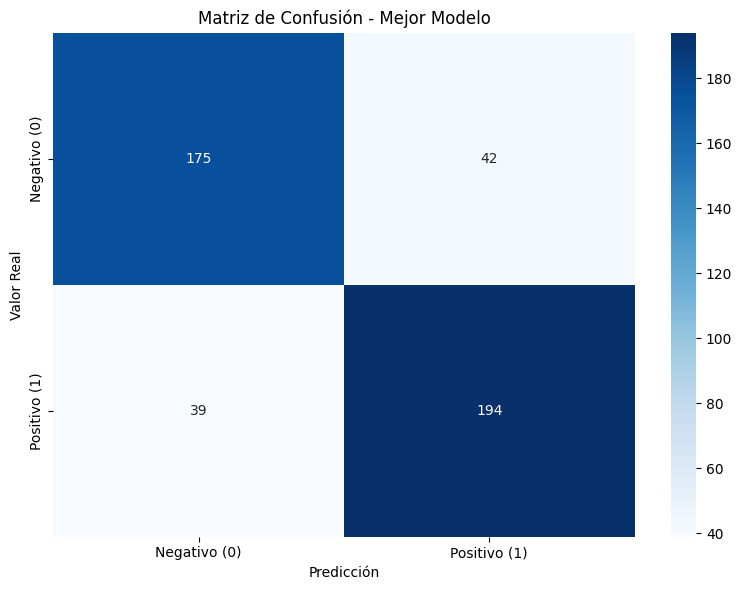


Métricas adicionales:
Precisión (Precision): 0.8220
Exhaustividad (Recall): 0.8326
Medida F1 (F1-Score): 0.8273
Especificidad (Specificity): 0.8065

Comparación con los resultados de la semana anterior:
* Aquí puedes añadir una comparación con los resultados de la semana anterior *
* Por ejemplo: 'El modelo embebido mejora en X% la exactitud sobre el modelo tradicional' *


In [57]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

from sklearn.metrics import confusion_matrix

mejor_modelo = lr_model  # Modelo de regersión lineal

# Evaluación en el conjunto de prueba
y_test_pred = mejor_modelo.predict(testEmb)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Mostrar resultados
print("="*50)
print("EVALUACIÓN DEL MEJOR MODELO EN CONJUNTO DE PRUEBA")
print("="*50)
print(f"Exactitud en Prueba: {test_accuracy:.4f}")

# Classification Report
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_test_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_test_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Mejor Modelo')
plt.tight_layout()
plt.show()

# Calcular métricas adicionales
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp)

print("\nMétricas adicionales:")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Medida F1 (F1-Score): {f1:.4f}")
print(f"Especificidad (Specificity): {specificity:.4f}")

# Comparar con los resultados de la semana anterior
print("\nComparación con los resultados de la semana anterior:")
print("* Aquí puedes añadir una comparación con los resultados de la semana anterior *")
print("* Por ejemplo: 'El modelo embebido mejora en X% la exactitud sobre el modelo tradicional' *")


# *********** Aquí termina la sección de agregar código *************

# **Pregunta - 10:**

In [ ]:
# Incluye todas las líneas de código y celdas que consideres adecuadas para este ejercicio.


None




# **Pregunta - 11:**



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++

# **Fin de la Actividad de Vectores Embebidos - OpenAI**